In [15]:
import matplotlib.pyplot as plt
import librosa.feature
import numpy as np
from scipy.spatial.distance import euclidean
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

--- ANALIZA PONOVLJIVOSTI PRI ISTEM GOVORCU ---

Scenarij 1: Ponovljena izgovorjava iste fraze z isto intonacijo in hitrostjo


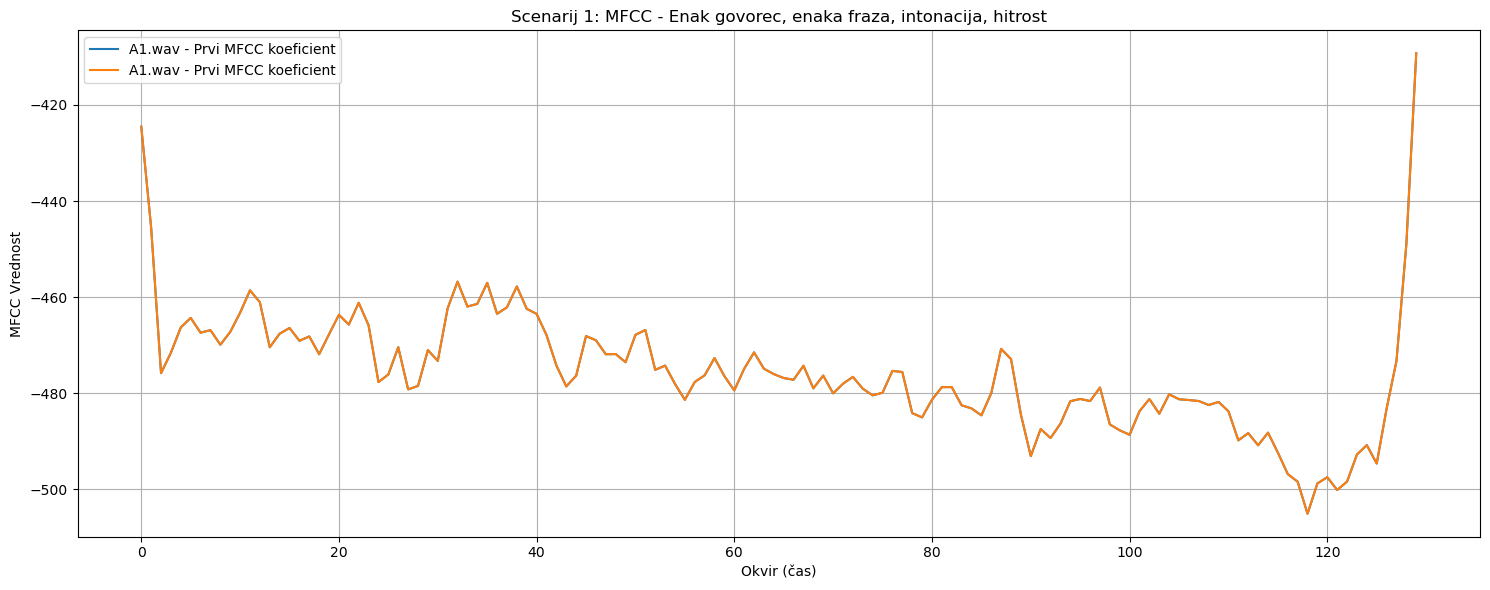

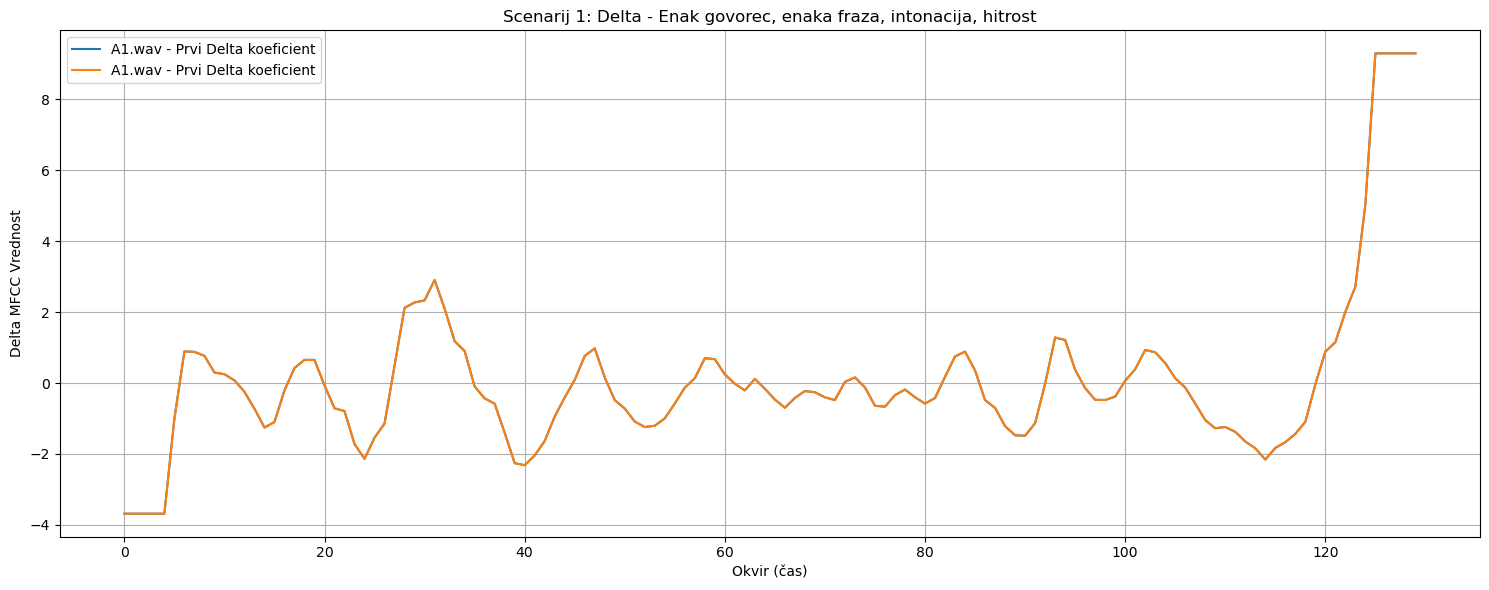

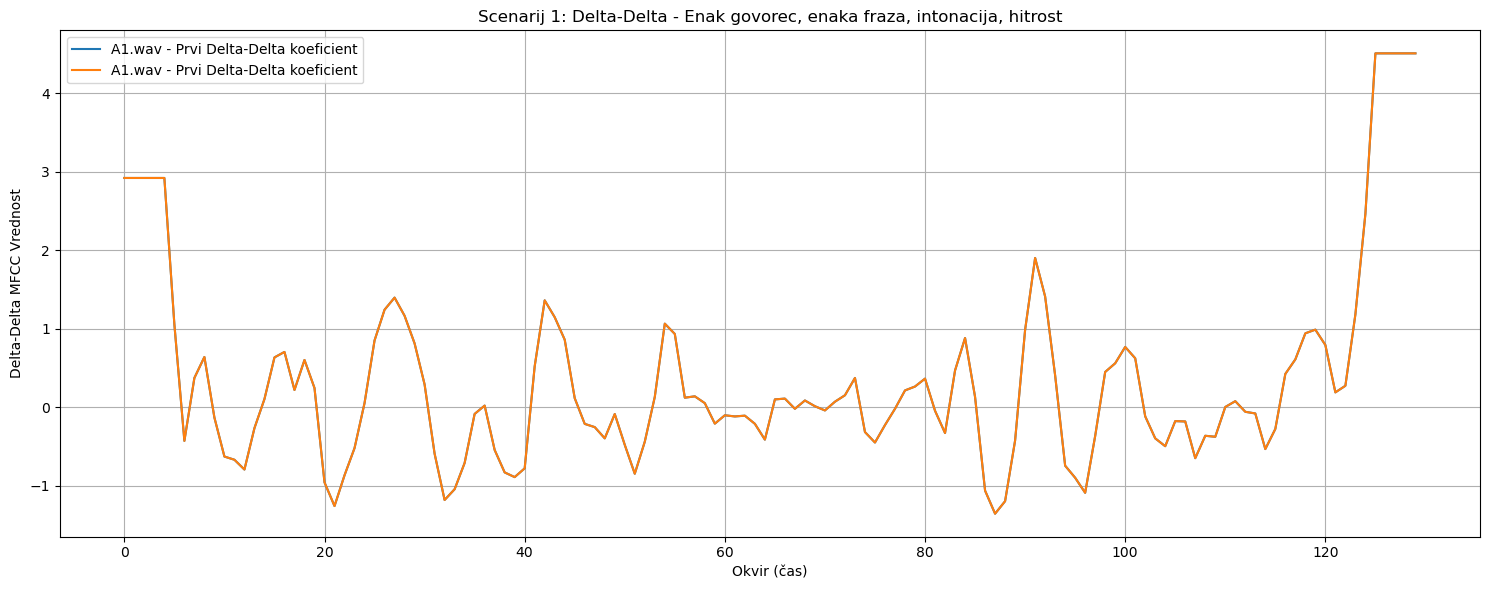

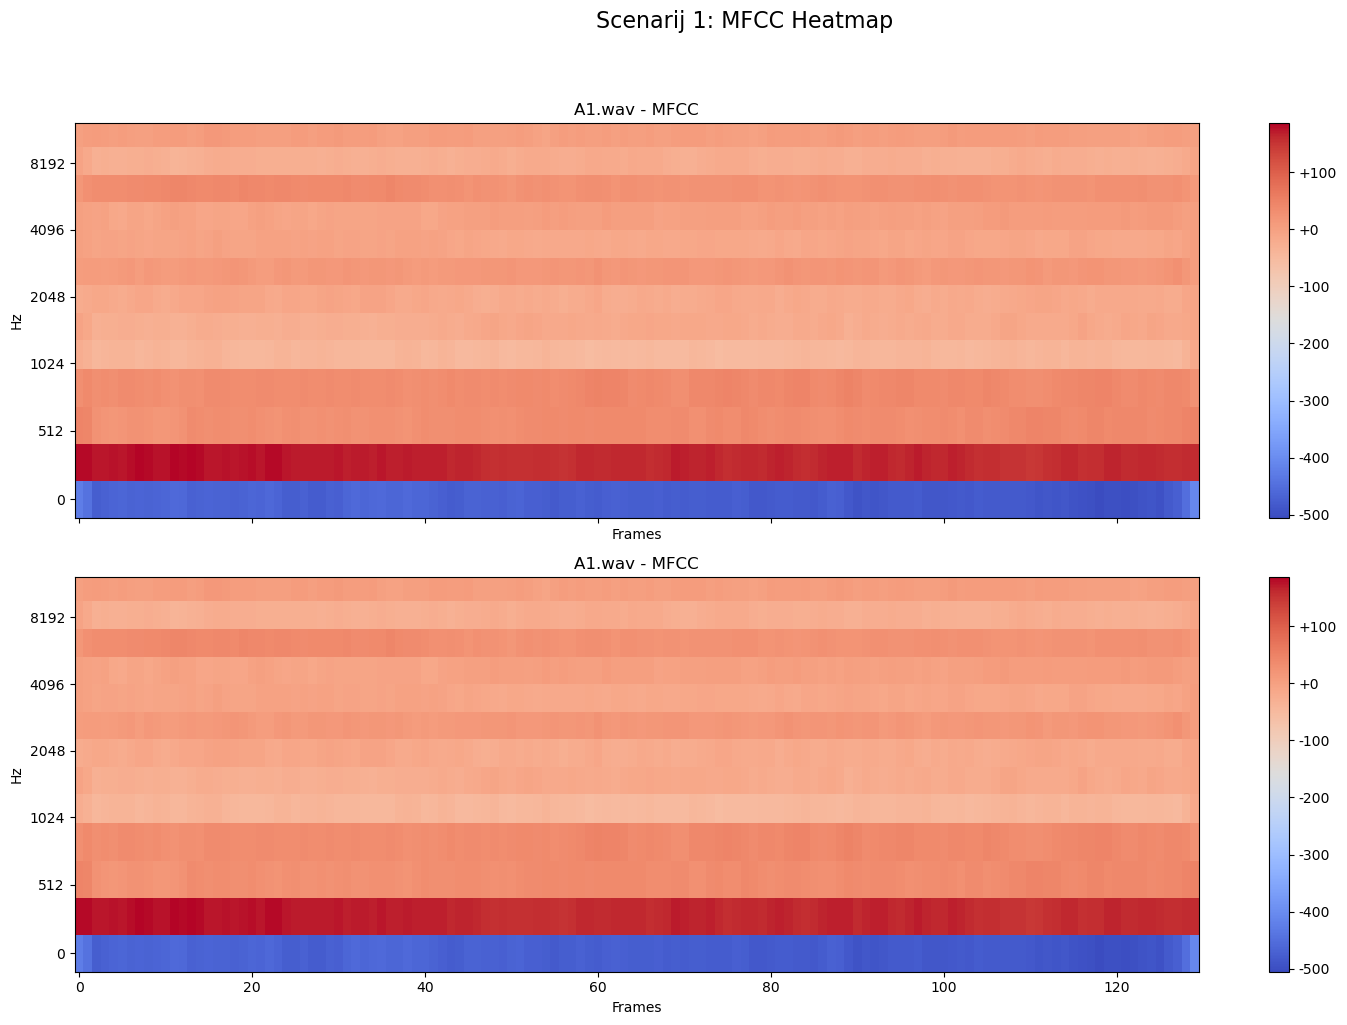


Scenarij 2: Ponovljena izgovorjava iste fraze z isto intonacijo in različno hitrostjo


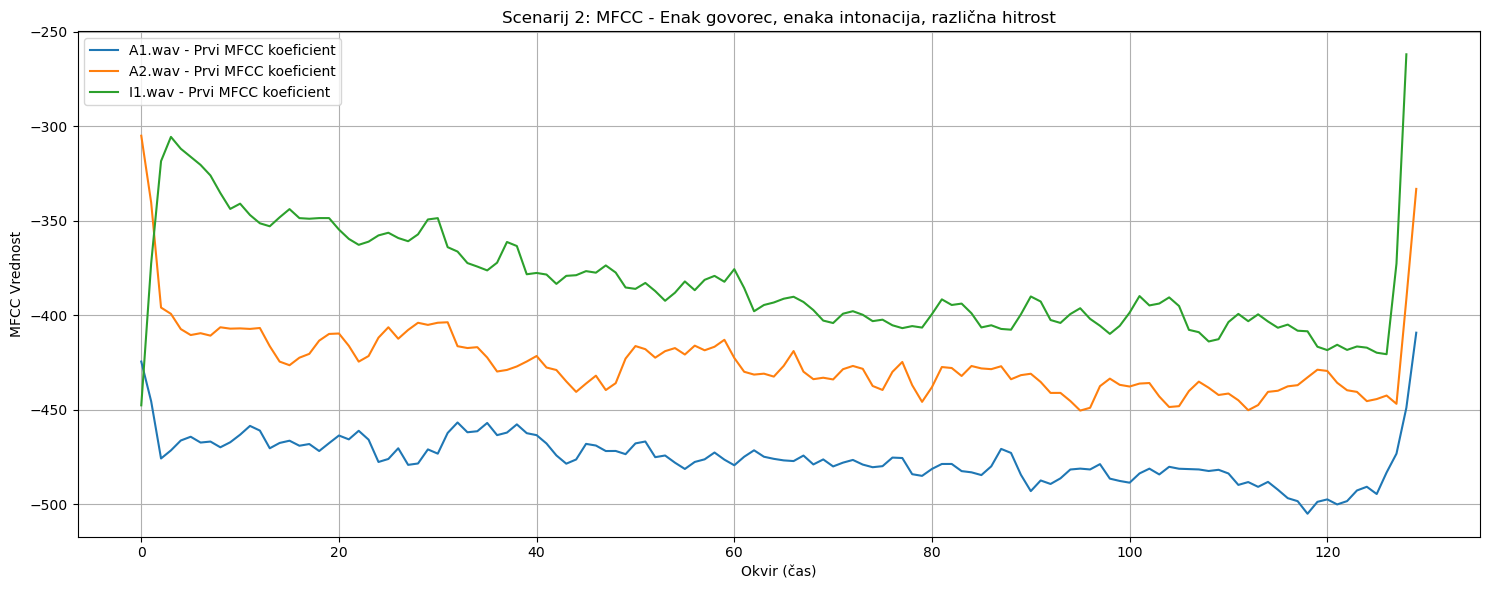

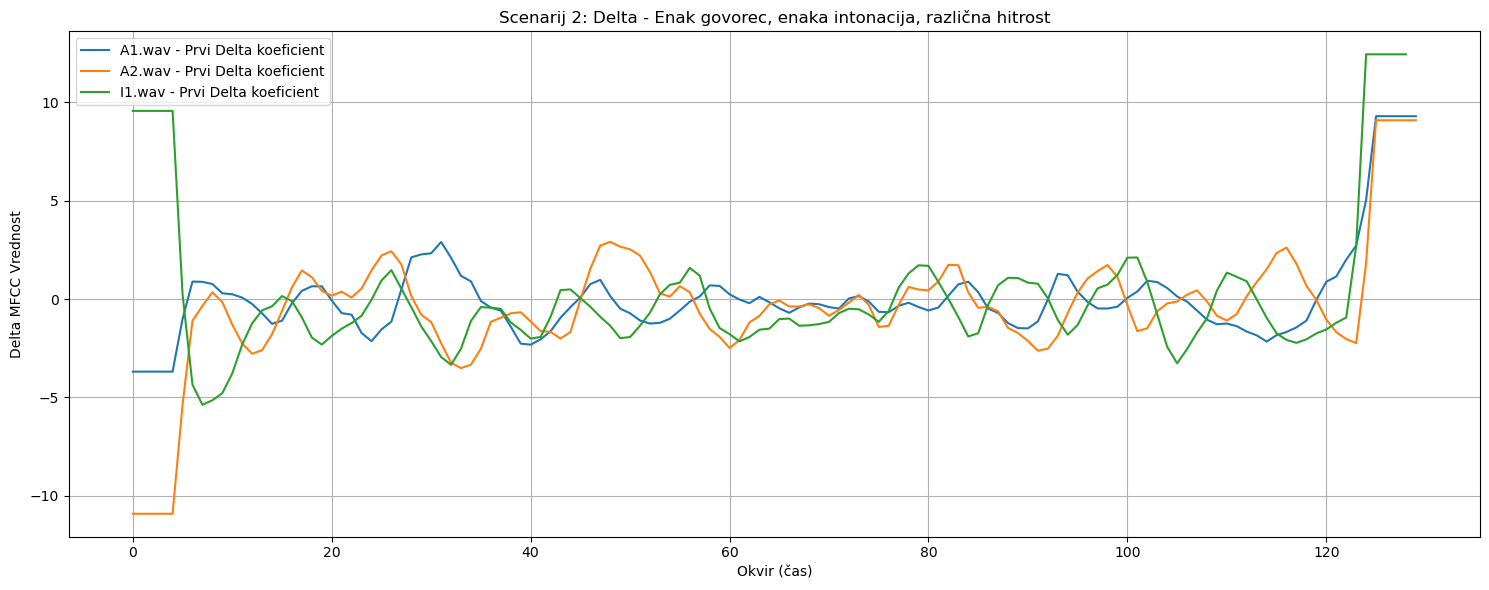

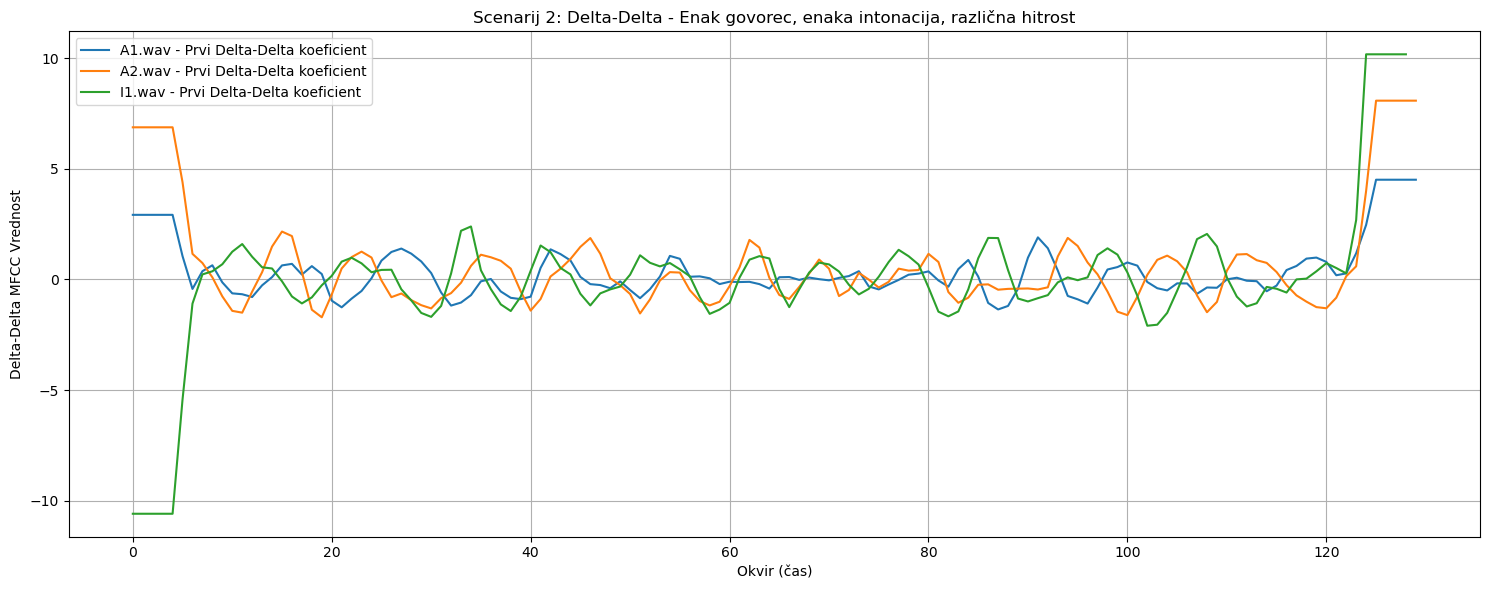

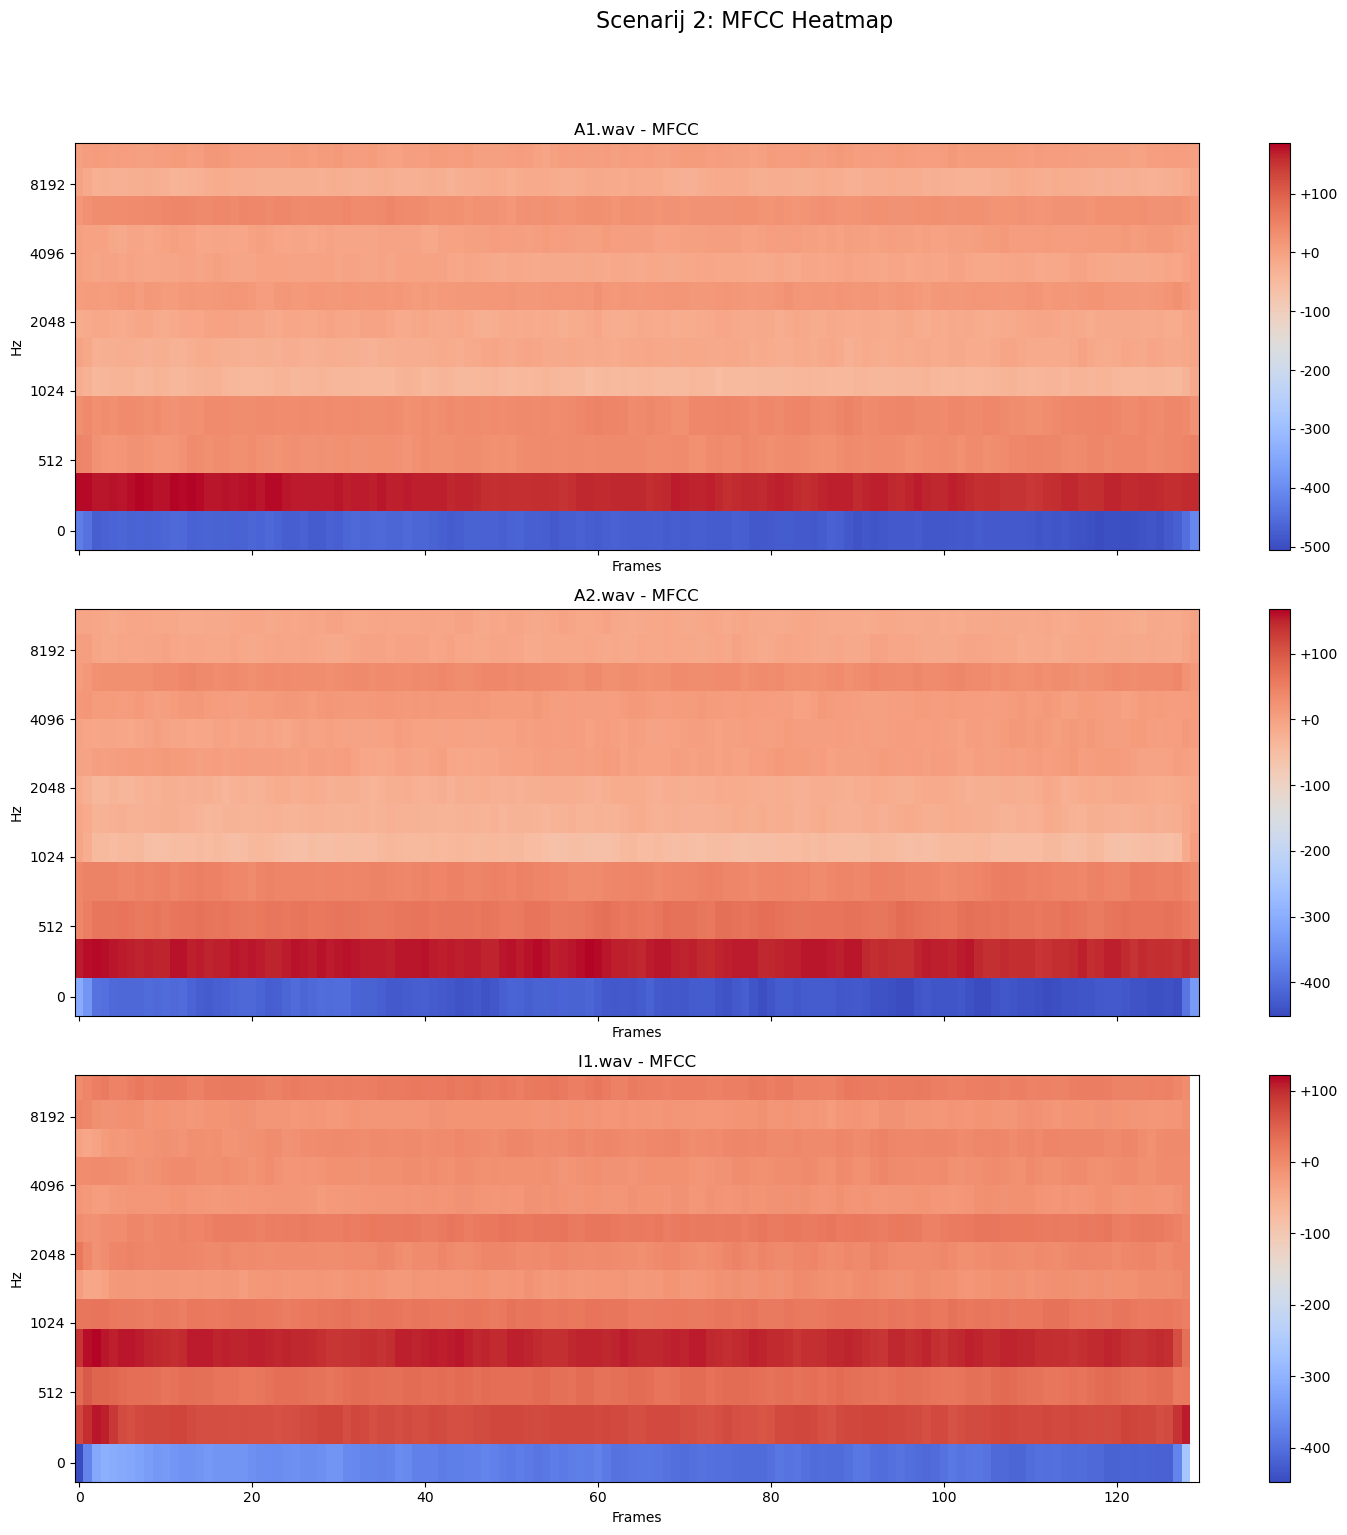


Scenarij 3: Ponovljena izgovorjava iste fraze ob različnih intonacijah in isti hitrosti


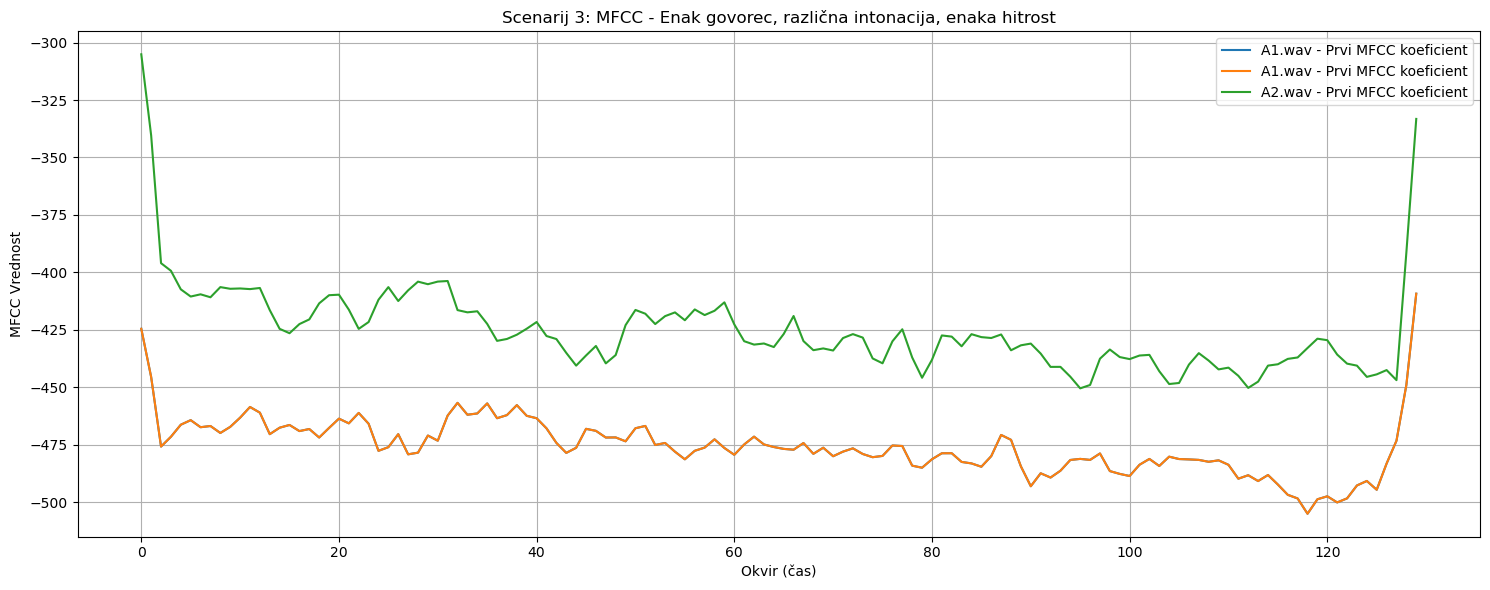

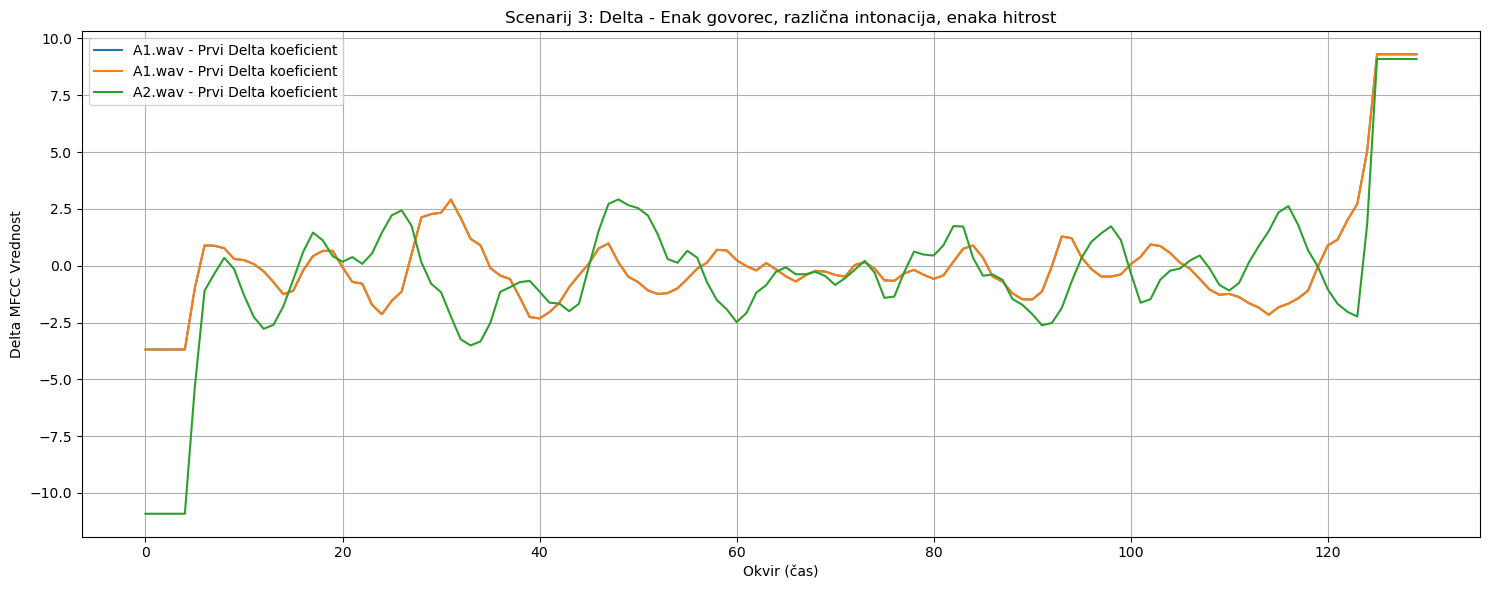

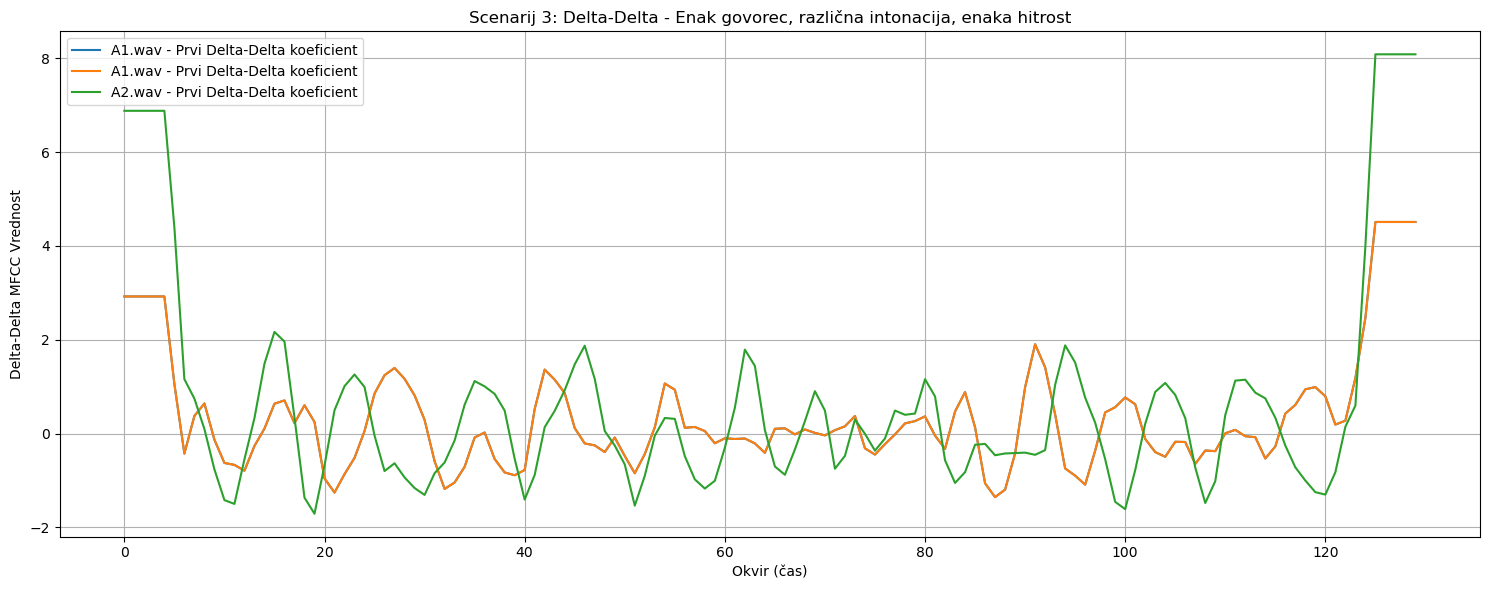

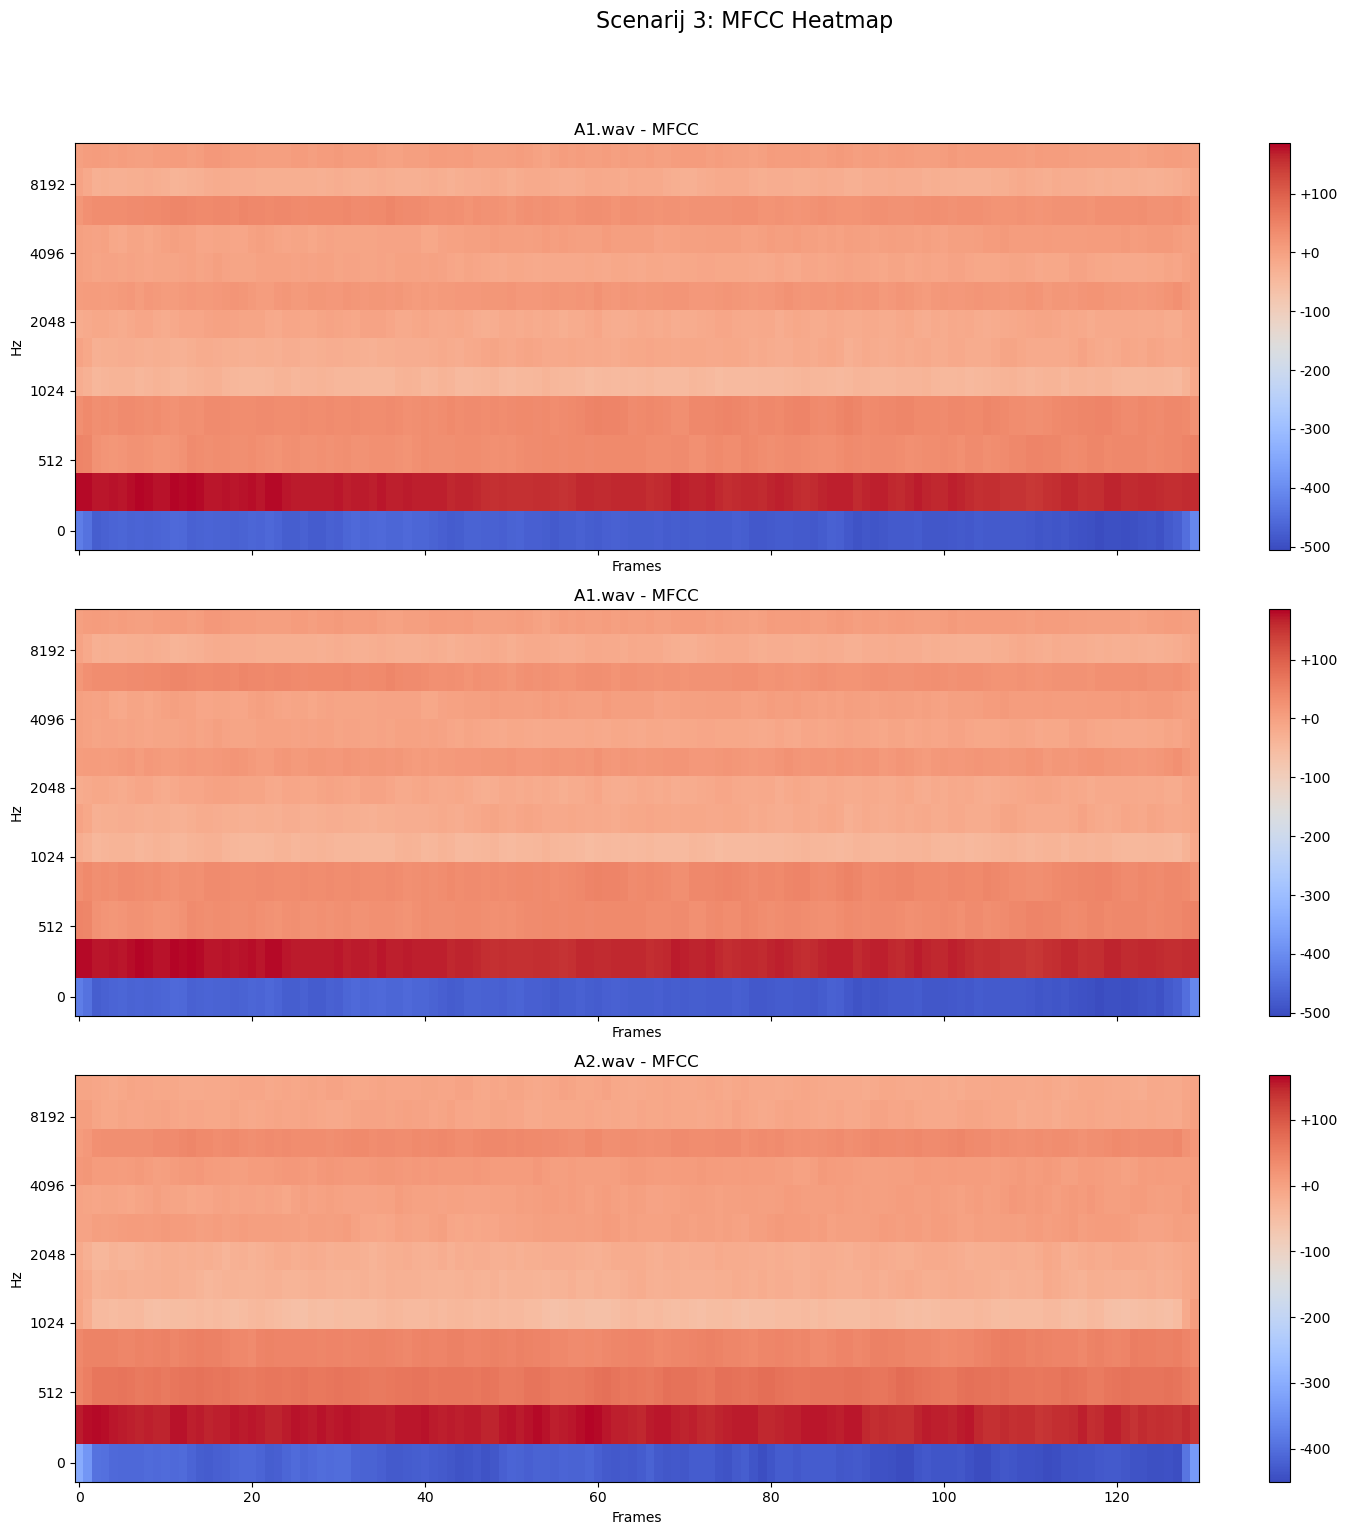


--- ANALIZA RAZLIK MED RAZLIČNIMI GOVORCI ---

Scenarij 4: Razlike med različnimi govorci (ista fraza, enaka intonacija, enaka hitrost)


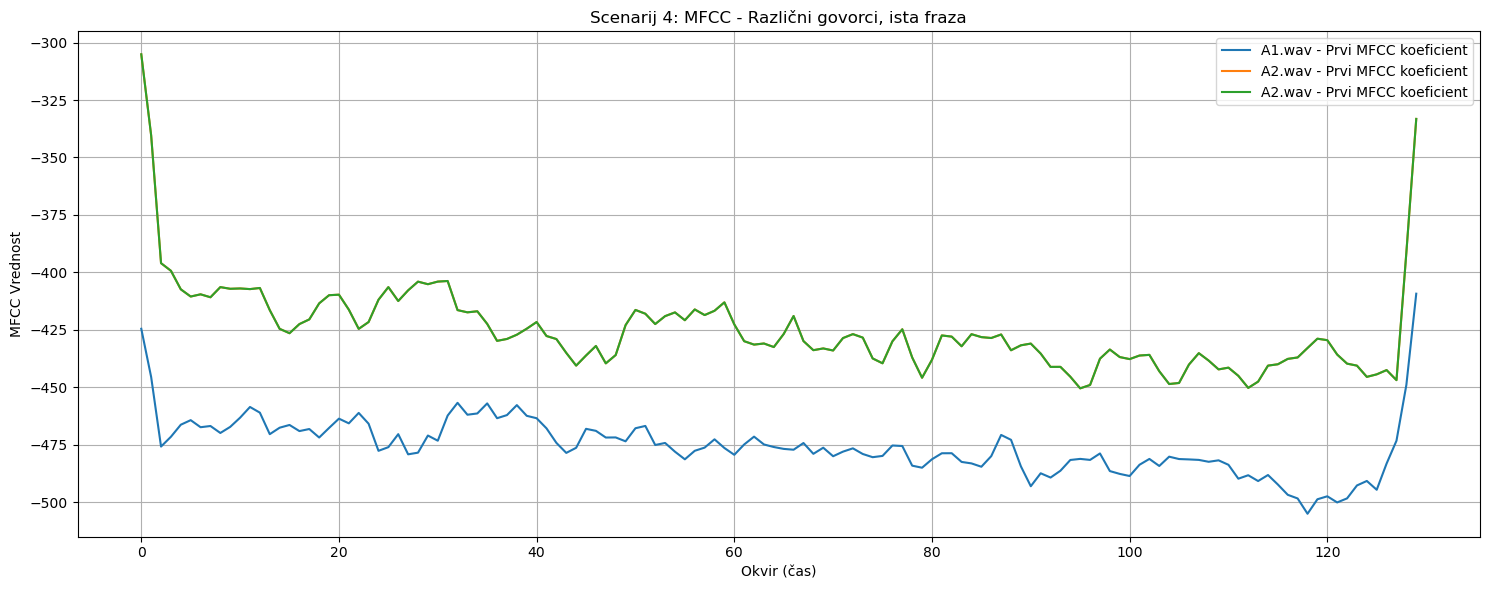

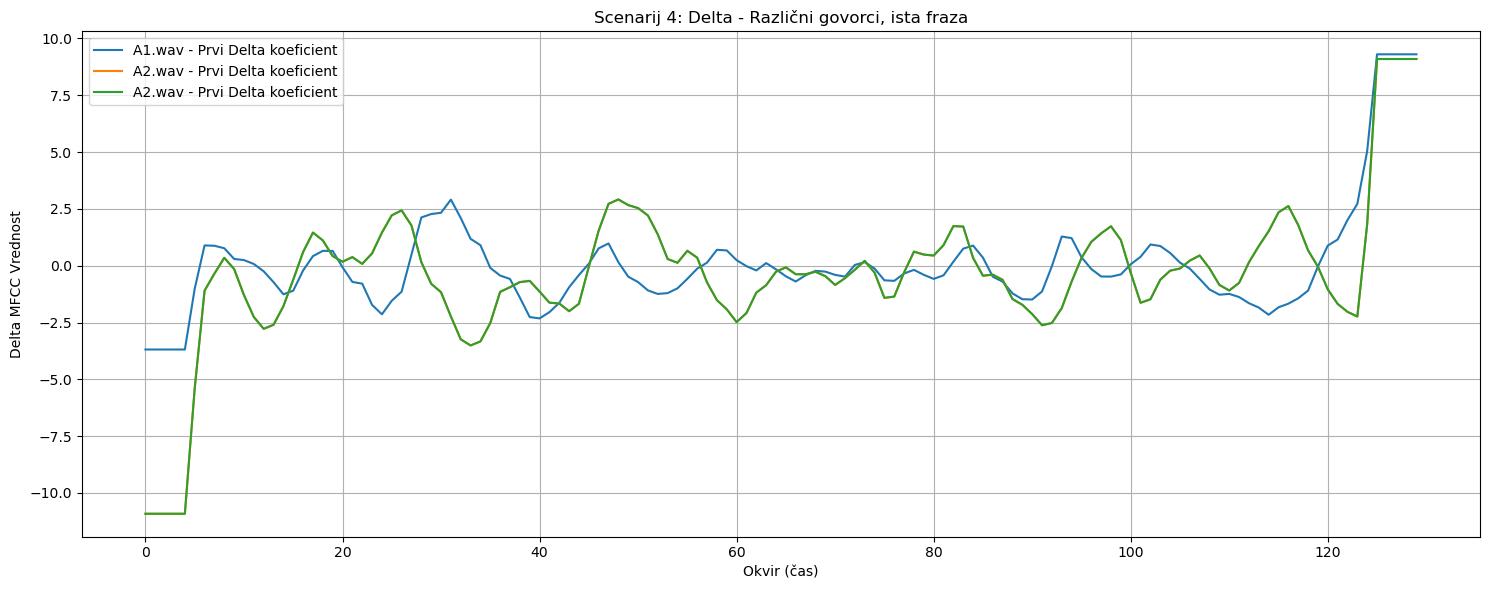

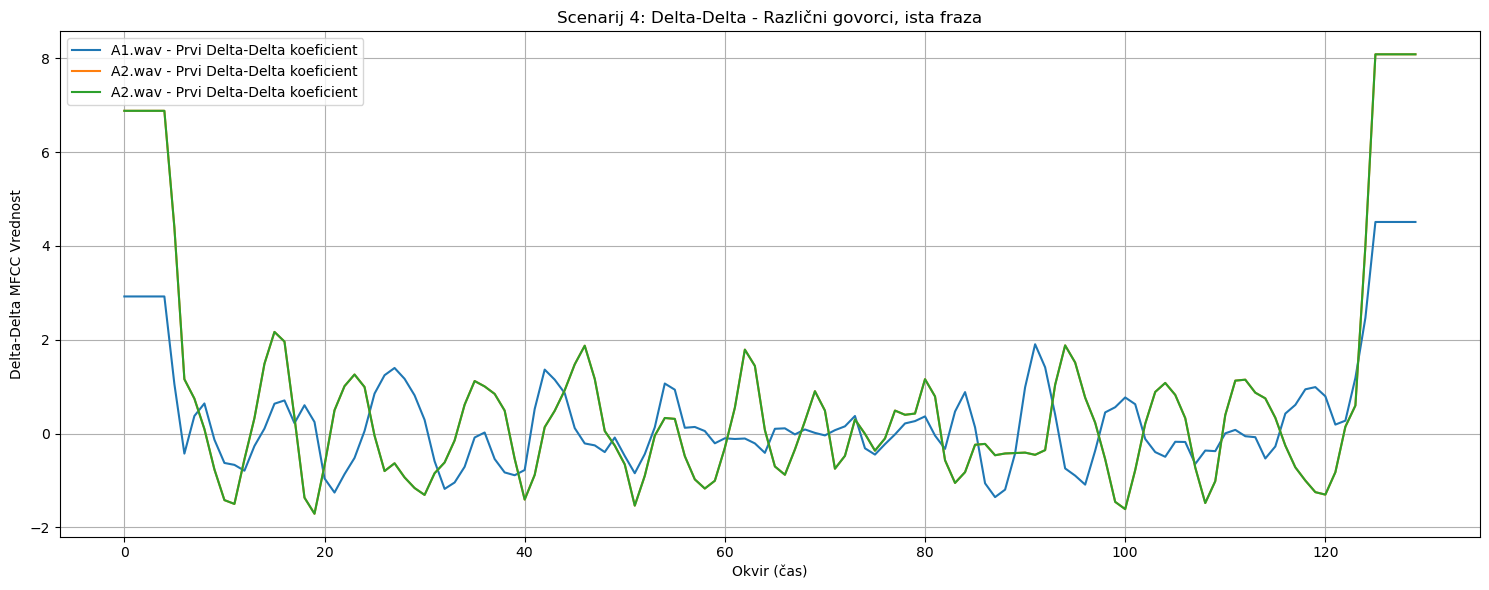

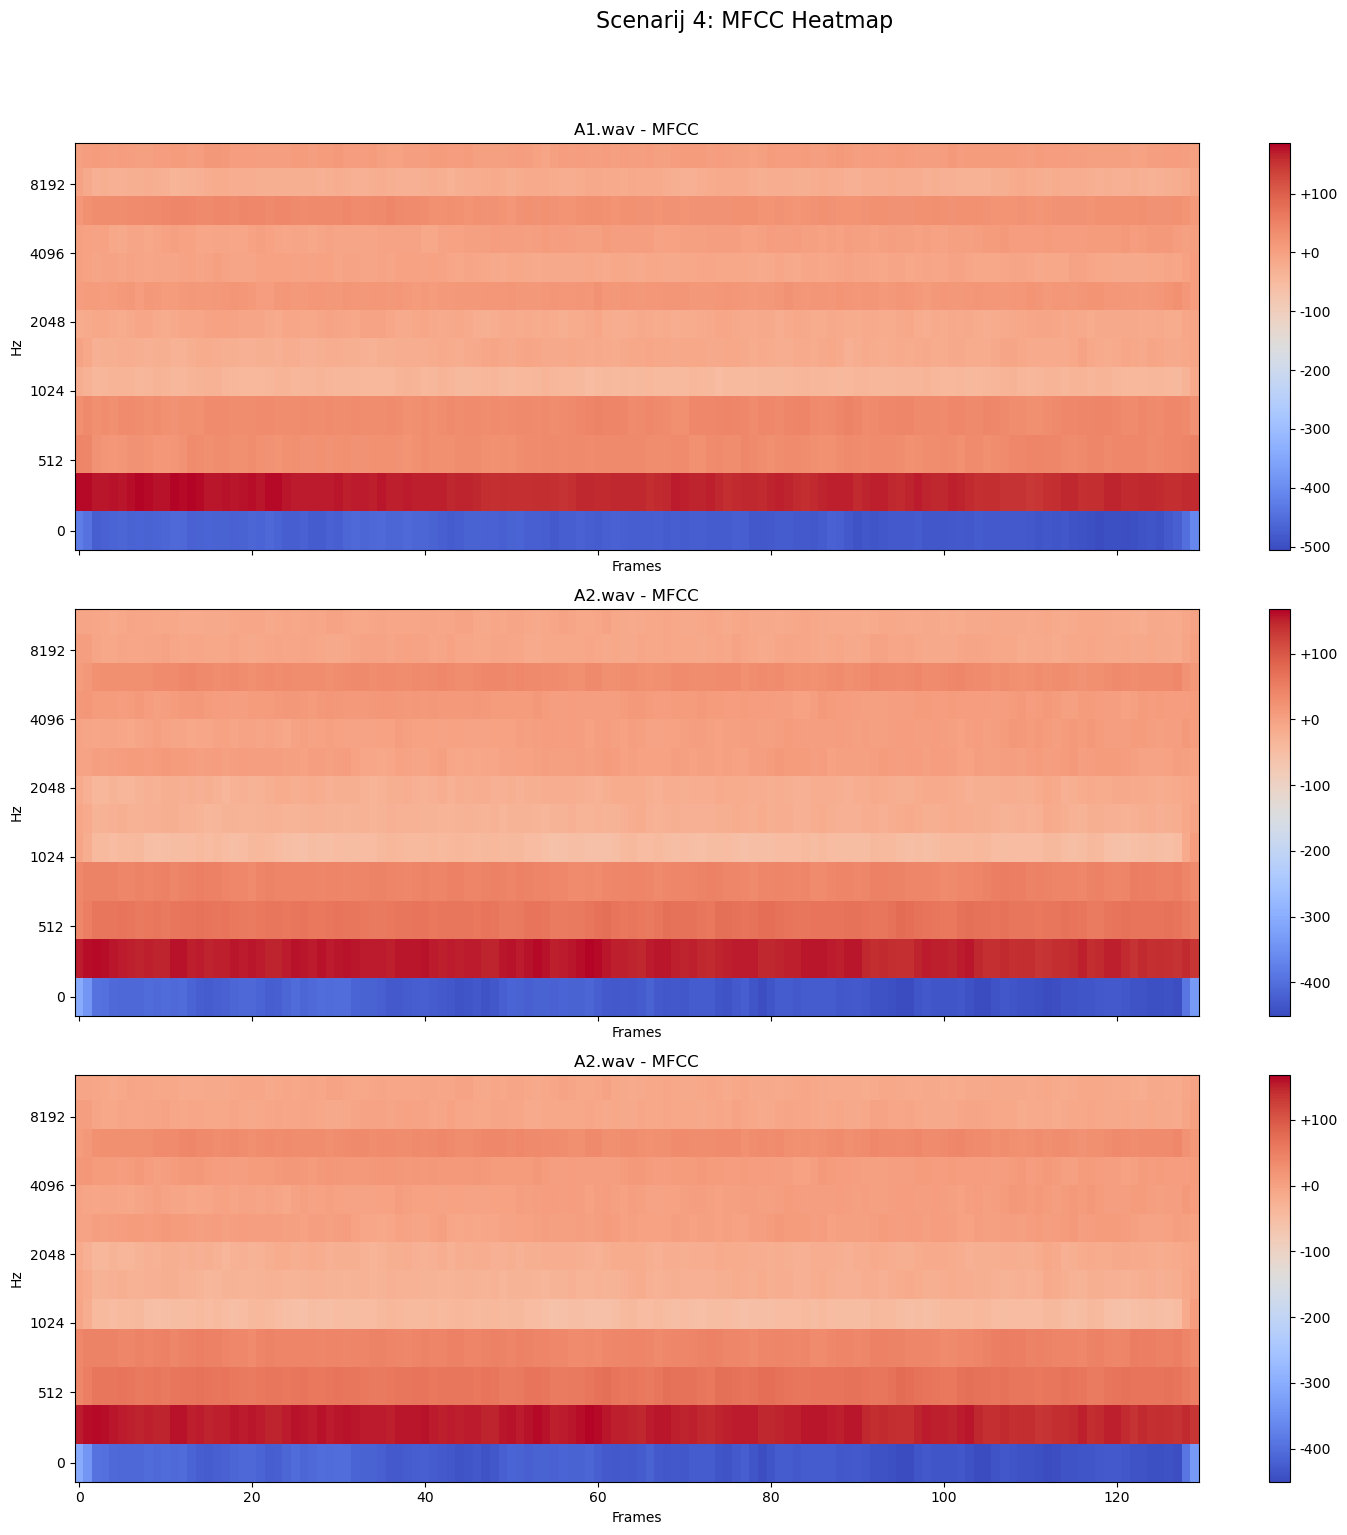

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os

def extract_features(audio_path, sr=22050, n_mfcc=13):
    try:
        y, sr = librosa.load(audio_path, sr=sr)
    except FileNotFoundError:
        print(f"Napaka: Datoteka ne obstaja - {audio_path}")
        return None, None, None
    except Exception as e:
        print(f"Napaka pri nalaganju avdio datoteke {audio_path}: {e}")
        return None, None, None

    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    delta_mfccs = librosa.feature.delta(mfccs)
    delta_delta_mfccs = librosa.feature.delta(mfccs, order=2)
    return mfccs, delta_mfccs, delta_delta_mfccs

def plot_features(features_list, feature_name, title, y_label, file_names):
    plt.figure(figsize=(15, 6))
    for i, features in enumerate(features_list):
        if features is not None and features.size > 0: # Dodana preverba za prazne arraye
            # Prikaz samo prvega koeficienta ali povprečja za boljše vizualizacije
            plt.plot(features[0, :], label=f'{file_names[i]} - Prvi {feature_name} koeficient')
            # plt.plot(np.mean(features, axis=0), label=f'{file_names[i]} - Povprečni {feature_name} koeficient')

    plt.title(title)
    plt.xlabel('Okvir (čas)')
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_feature_heatmap(features_list, feature_name, title, file_names):
    num_plots = len(features_list)
    fig, axes = plt.subplots(num_plots, 1, figsize=(15, 5 * num_plots), sharex=True)
    if num_plots == 1:
        axes = [axes]

    for i, features in enumerate(features_list):
        if features is not None and features.size > 0: # Dodana preverba za prazne arraye
            img = librosa.display.specshow(features, x_axis='frames', y_axis='mel' if feature_name == 'MFCC' else 'linear', ax=axes[i])
            axes[i].set_title(f'{file_names[i]} - {feature_name}')
            fig.colorbar(img, ax=axes[i], format='%+2.0f')
        else:
            # Prazna slika ali napaka, opozorimo uporabnika in nastavimo naslov
            axes[i].set_title(f'{file_names[i]} - {feature_name} (Ni podatkov za prikaz)')
            print(f"Opozorilo: Ni podatkov za toplotno karto za {file_names[i]} ({feature_name}).")

    fig.suptitle(title, fontsize=16, y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

AUDIO_DIR = 'data'
os.makedirs(AUDIO_DIR, exist_ok=True)

SAMPLE_RATE = 22050
N_MFCC = 13

# Scenarij 1: Ponovljena izgovorjava iste fraze z isto intonacijo in hitrostjo
s1_g1_fraza_a1 = os.path.join(AUDIO_DIR, 'A1.wav')
s1_g1_fraza_a2 = os.path.join(AUDIO_DIR, 'A2.wav')

# Scenarij 2: Ponovljena izgovorjava iste fraze z isto intonacijo in različno hitrostjo
s2_g1_fraza_b_normal = os.path.join(AUDIO_DIR, 'A1.wav')
s2_g1_fraza_b_hitro = os.path.join(AUDIO_DIR, 'A2.wav')
s2_g1_fraza_b_pocasi = os.path.join(AUDIO_DIR, 'I1.wav')

# Scenarij 3: Ponovljena izgovorjava iste fraze ob različnih intonacijah in isti hitrosti
s3_g1_fraza_c_normal = os.path.join(AUDIO_DIR, 'A1.wav')
s3_g1_fraza_c_visoka = os.path.join(AUDIO_DIR, 'A1.wav')
s3_g1_fraza_c_nizka = os.path.join(AUDIO_DIR, 'A2.wav')

# Scenarij 4: Razlike med vsaj dvema govorcema (ista fraza, ista intonacija, ista hitrost)
s4_g1_fraza_d = os.path.join(AUDIO_DIR, 'A1.wav')
s4_g2_fraza_d = os.path.join(AUDIO_DIR, 'A2.wav')
s4_g3_fraza_d = os.path.join(AUDIO_DIR, 'A2.wav')

# --- IZVEDBA ANALIZE ---
print("--- ANALIZA PONOVLJIVOSTI PRI ISTEM GOVORCU ---")

# Scenarij 1: Ponovljena izgovorjava iste fraze z isto intonacijo in hitrostjo
print("\nScenarij 1: Ponovljena izgovorjava iste fraze z isto intonacijo in hitrostjo")
mfccs1_s1, delta_mfccs1_s1, dd_mfccs1_s1 = extract_features(s1_g1_fraza_a1, sr=SAMPLE_RATE, n_mfcc=N_MFCC)
mfccs2_s1, delta_mfccs2_s1, dd_mfccs2_s1 = extract_features(s1_g1_fraza_a2, sr=SAMPLE_RATE, n_mfcc=N_MFCC)

if all(f is not None for f in [mfccs1_s1, mfccs2_s1]):
    plot_features([mfccs1_s1, mfccs2_s1], 'MFCC', 'Scenarij 1: MFCC - Enak govorec, enaka fraza, intonacija, hitrost', 'MFCC Vrednost', [os.path.basename(s1_g1_fraza_a1), os.path.basename(s1_g1_fraza_a2)])
    plot_features([delta_mfccs1_s1, delta_mfccs2_s1], 'Delta', 'Scenarij 1: Delta - Enak govorec, enaka fraza, intonacija, hitrost', 'Delta MFCC Vrednost', [os.path.basename(s1_g1_fraza_a1), os.path.basename(s1_g1_fraza_a2)])
    plot_features([dd_mfccs1_s1, dd_mfccs2_s1], 'Delta-Delta', 'Scenarij 1: Delta-Delta - Enak govorec, enaka fraza, intonacija, hitrost', 'Delta-Delta MFCC Vrednost', [os.path.basename(s1_g1_fraza_a1), os.path.basename(s1_g1_fraza_a2)])
    plot_feature_heatmap([mfccs1_s1, mfccs2_s1], 'MFCC', 'Scenarij 1: MFCC Heatmap', [os.path.basename(s1_g1_fraza_a1), os.path.basename(s1_g1_fraza_a2)])

# Scenarij 2: Ponovljena izgovorjava iste fraze z isto intonacijo in različno hitrostjo
print("\nScenarij 2: Ponovljena izgovorjava iste fraze z isto intonacijo in različno hitrostjo")
mfccs_norm_s2, delta_norm_s2, dd_norm_s2 = extract_features(s2_g1_fraza_b_normal, sr=SAMPLE_RATE, n_mfcc=N_MFCC)
mfccs_hitro_s2, delta_hitro_s2, dd_hitro_s2 = extract_features(s2_g1_fraza_b_hitro, sr=SAMPLE_RATE, n_mfcc=N_MFCC)
mfccs_pocasi_s2, delta_pocasi_s2, dd_pocasi_s2 = extract_features(s2_g1_fraza_b_pocasi, sr=SAMPLE_RATE, n_mfcc=N_MFCC)

files_s2 = [os.path.basename(s2_g1_fraza_b_normal), os.path.basename(s2_g1_fraza_b_hitro), os.path.basename(s2_g1_fraza_b_pocasi)]

if all(f is not None for f in [mfccs_norm_s2, mfccs_hitro_s2, mfccs_pocasi_s2]):
    plot_features([mfccs_norm_s2, mfccs_hitro_s2, mfccs_pocasi_s2], 'MFCC', 'Scenarij 2: MFCC - Enak govorec, enaka intonacija, različna hitrost', 'MFCC Vrednost', files_s2)
    plot_features([delta_norm_s2, delta_hitro_s2, delta_pocasi_s2], 'Delta', 'Scenarij 2: Delta - Enak govorec, enaka intonacija, različna hitrost', 'Delta MFCC Vrednost', files_s2)
    plot_features([dd_norm_s2, dd_hitro_s2, dd_pocasi_s2], 'Delta-Delta', 'Scenarij 2: Delta-Delta - Enak govorec, enaka intonacija, različna hitrost', 'Delta-Delta MFCC Vrednost', files_s2)
    plot_feature_heatmap([mfccs_norm_s2, mfccs_hitro_s2, mfccs_pocasi_s2], 'MFCC', 'Scenarij 2: MFCC Heatmap', files_s2)


# Scenarij 3: Ponovljena izgovorjava iste fraze ob različnih intonacijah in isti hitrosti
print("\nScenarij 3: Ponovljena izgovorjava iste fraze ob različnih intonacijah in isti hitrosti")
mfccs_norm_s3, delta_norm_s3, dd_norm_s3 = extract_features(s3_g1_fraza_c_normal, sr=SAMPLE_RATE, n_mfcc=N_MFCC)
mfccs_visoka_s3, delta_visoka_s3, dd_visoka_s3 = extract_features(s3_g1_fraza_c_visoka, sr=SAMPLE_RATE, n_mfcc=N_MFCC)
mfccs_nizka_s3, delta_nizka_s3, dd_nizka_s3 = extract_features(s3_g1_fraza_c_nizka, sr=SAMPLE_RATE, n_mfcc=N_MFCC)

files_s3 = [os.path.basename(s3_g1_fraza_c_normal), os.path.basename(s3_g1_fraza_c_visoka), os.path.basename(s3_g1_fraza_c_nizka)]

if all(f is not None for f in [mfccs_norm_s3, mfccs_visoka_s3, mfccs_nizka_s3]):
    plot_features([mfccs_norm_s3, mfccs_visoka_s3, mfccs_nizka_s3], 'MFCC', 'Scenarij 3: MFCC - Enak govorec, različna intonacija, enaka hitrost', 'MFCC Vrednost', files_s3)
    plot_features([delta_norm_s3, delta_visoka_s3, delta_nizka_s3], 'Delta', 'Scenarij 3: Delta - Enak govorec, različna intonacija, enaka hitrost', 'Delta MFCC Vrednost', files_s3)
    plot_features([dd_norm_s3, dd_visoka_s3, dd_nizka_s3], 'Delta-Delta', 'Scenarij 3: Delta-Delta - Enak govorec, različna intonacija, enaka hitrost', 'Delta-Delta MFCC Vrednost', files_s3)
    plot_feature_heatmap([mfccs_norm_s3, mfccs_visoka_s3, mfccs_nizka_s3], 'MFCC', 'Scenarij 3: MFCC Heatmap', files_s3)


print("\n--- ANALIZA RAZLIK MED RAZLIČNIMI GOVORCI ---")

# Scenarij 4: Razlike med vsaj dvema govorcema (ista fraza, ista intonacija, ista hitrost)
print("\nScenarij 4: Razlike med različnimi govorci (ista fraza, enaka intonacija, enaka hitrost)")
mfccs_g1_s4, delta_g1_s4, dd_g1_s4 = extract_features(s4_g1_fraza_d, sr=SAMPLE_RATE, n_mfcc=N_MFCC)
mfccs_g2_s4, delta_g2_s4, dd_g2_s4 = extract_features(s4_g2_fraza_d, sr=SAMPLE_RATE, n_mfcc=N_MFCC)
mfccs_g3_s4, delta_g3_s4, dd_g3_s4 = extract_features(s4_g3_fraza_d, sr=SAMPLE_RATE, n_mfcc=N_MFCC)

files_s4 = [os.path.basename(s4_g1_fraza_d), os.path.basename(s4_g2_fraza_d), os.path.basename(s4_g3_fraza_d)]

if all(f is not None for f in [mfccs_g1_s4, mfccs_g2_s4, mfccs_g3_s4]):
    plot_features([mfccs_g1_s4, mfccs_g2_s4, mfccs_g3_s4], 'MFCC', 'Scenarij 4: MFCC - Različni govorci, ista fraza', 'MFCC Vrednost', files_s4)
    plot_features([delta_g1_s4, delta_g2_s4, delta_g3_s4], 'Delta', 'Scenarij 4: Delta - Različni govorci, ista fraza', 'Delta MFCC Vrednost', files_s4)
    plot_features([dd_g1_s4, dd_g2_s4, dd_g3_s4], 'Delta-Delta', 'Scenarij 4: Delta-Delta - Različni govorci, ista fraza', 'Delta-Delta MFCC Vrednost', files_s4)
    plot_feature_heatmap([mfccs_g1_s4, mfccs_g2_s4, mfccs_g3_s4], 'MFCC', 'Scenarij 4: MFCC Heatmap', files_s4)
